In [41]:
%matplotlib inline
import seaborn
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display
plt.rcParams['figure.figsize'] = (14, 5)
import mir_eval , mir_eval.display


# Harmonic-Percussive Source Separation

Load the signal

In [5]:
# xh, sr_h = librosa.load('audio/prelude_cmaj.wav', duration=7, sr=None)
xh, sr_h = librosa.load('audio/daddys_car.mp3', duration=30)


/home/lgp/anaconda3/envs/LAB_3.9/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [10]:
ipd.Audio(xh, rate=sr_h)

In [15]:
print(len(xh), sr_h)

661500 22050


Short transform Compute the STFT:

In [17]:
X = librosa.stft(xh)

Take the log-ampllitude for display purposes:

In [18]:
Xmag = librosa.amplitude_to_db(X)

/home/lgp/anaconda3/envs/LAB_3.9/lib/python3.9/site-packages/librosa/core/spectrum.py:1641: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn(


Display the log-magnitude spectrogram:

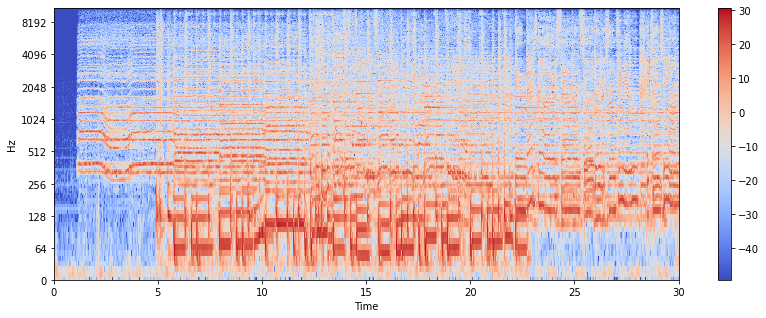

In [19]:
librosa.display.specshow(Xmag, sr=sr_h, x_axis='time', y_axis='log')
plt.colorbar()

Perform harmonic-percussive source separation:

In [23]:
H, P = librosa.decompose.hpss(X)

Compute the log-amplitudes of the outputs:

In [24]:
Hmag = librosa.amplitude_to_db(H)
Pmag = librosa.amplitude_to_db(P)

Display each output:

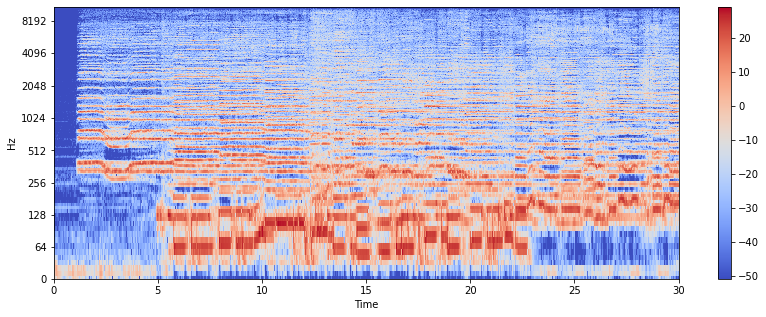

In [28]:
librosa.display.specshow(Hmag, sr=sr_h, x_axis='time', y_axis='log')
plt.colorbar();

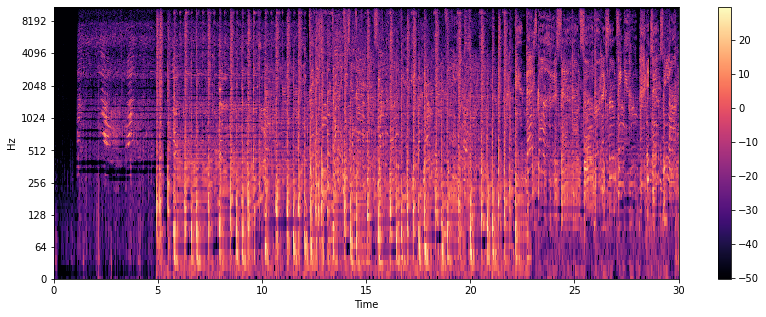

In [27]:
librosa.display.specshow(Pmag, sr=sr_h, x_axis='time', y_axis='log')
plt.colorbar();

Transform the harmonic output back to the time domain:

In [29]:
h = librosa.istft(H)

Listen to the harmonic output:

In [30]:
ipd.Audio(h, rate=sr_h)

Transform the percusive output back to the time domain:

In [31]:
p = librosa.istft(P)

Listen to the percusive output:

In [32]:
ipd.Audio(p, rate=sr_h)

### Example: Source Separation

In [39]:
y_harm, y_perc = librosa.effects.hpss(xh, margin=8)

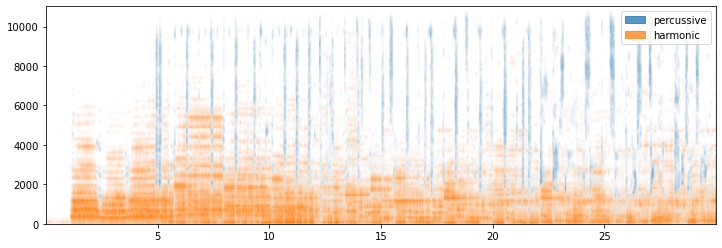

In [42]:
plt.figure(figsize=(12, 4))
mir_eval.display.separation([y_perc, y_harm], sr_h, labels=['percussive', 'harmonic'])
plt.legend();

In [43]:
# mir_eval.sonify.chords()

TypeError: chords() missing 3 required positional arguments: 'chord_labels', 'intervals', and 'fs'